In [25]:
import pandas as pd
import requests
import numpy as np
# from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import keras
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer

In [26]:
res = requests.get("https://ai-emp-fog-comp.herokuapp.com/data")
response = res.json()

In [27]:
df = pd.DataFrame.from_dict(response["data"])

In [28]:
df.columns

Index(['Vehicle 1 Speed', 'Vehicle 2 Speed', 'Vehicle 3 Speed',
       'Vehicle 4 Speed', 'Vehicle 5 Speed', 'Vehicle 6 Speed',
       'Vehicle 7 Speed', 'Vehicle 8 Speed', 'Vehicle 9 Speed',
       'Vehicle 10 Speed', 'Vehicle 11 Speed', 'Vehicle 12 Speed',
       'Vehicle 13 Speed', 'Vehicle 14 Speed', 'Vehicle 15 Speed',
       'Vehicle 16 Speed', 'Vehicle 17 Speed', 'Vehicle 1 Position',
       'Vehicle 2 Position', 'Vehicle 3 Position', 'Vehicle 4 Position',
       'Vehicle 5 Position', 'Vehicle 6 Position', 'Vehicle 7 Position',
       'Vehicle 8 Position', 'Vehicle 9 Position', 'Vehicle 10 Position',
       'Vehicle 11 Position', 'Vehicle 12 Position', 'Vehicle 13 Position',
       'Vehicle 14 Position', 'Vehicle 15 Position', 'Vehicle 16 Position',
       'Vehicle 17 Position'],
      dtype='object')

In [29]:
df.isnull().sum()

Vehicle 1 Speed        0
Vehicle 2 Speed        0
Vehicle 3 Speed        0
Vehicle 4 Speed        0
Vehicle 5 Speed        0
Vehicle 6 Speed        0
Vehicle 7 Speed        0
Vehicle 8 Speed        0
Vehicle 9 Speed        0
Vehicle 10 Speed       0
Vehicle 11 Speed       0
Vehicle 12 Speed       0
Vehicle 13 Speed       0
Vehicle 14 Speed       0
Vehicle 15 Speed       0
Vehicle 16 Speed       0
Vehicle 17 Speed       0
Vehicle 1 Position     0
Vehicle 2 Position     0
Vehicle 3 Position     0
Vehicle 4 Position     0
Vehicle 5 Position     0
Vehicle 6 Position     0
Vehicle 7 Position     0
Vehicle 8 Position     0
Vehicle 9 Position     0
Vehicle 10 Position    0
Vehicle 11 Position    0
Vehicle 12 Position    0
Vehicle 13 Position    0
Vehicle 14 Position    0
Vehicle 15 Position    0
Vehicle 16 Position    0
Vehicle 17 Position    0
dtype: int64

In [30]:
# speed
df_speed=df.iloc[:,17:]
df_speed

,Vehicle 1 Position,Vehicle 2 Position,Vehicle 3 Position,Vehicle 4 Position,Vehicle 5 Position,Vehicle 6 Position,Vehicle 7 Position,Vehicle 8 Position,Vehicle 9 Position,Vehicle 10 Position,Vehicle 11 Position,Vehicle 12 Position,Vehicle 13 Position,Vehicle 14 Position,Vehicle 15 Position,Vehicle 16 Position,Vehicle 17 Position
0,0.028950,0.030405,0.029643,0.028240,0.028399,0.028917,0.029599,0.025812,0.029769,0.030708,0.028101,0.029805,0.012965,0.025751,0.031615,0.025937,0.005722
1,0.028174,0.029470,0.028187,0.029300,0.028755,0.031555,0.027172,0.030105,0.028598,0.023706,0.027791,0.028467,0.010624,0.025793,0.027447,0.029265,0.011641
2,0.026803,0.028105,0.028187,0.027900,0.027891,0.030134,0.029839,0.026537,0.026374,0.027863,0.027714,0.029686,0.010354,0.030225,0.027745,0.026473,0.021782
3,0.029385,0.030561,0.027171,0.027539,0.029797,0.026076,0.029407,0.024976,0.025867,0.024362,0.028023,0.028849,0.009724,0.026964,0.027983,0.028730,0.029793
4,0.027328,0.028066,0.028517,0.028473,0.028221,0.027192,0.028229,0.028767,0.030003,0.025237,0.028591,0.027415,0.006453,0.030601,0.030126,0.026932,0.030227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.029316,0.028144,0.028709,0.027051,0.029187,0.034193,0.027725,0.027206,0.028169,0.025675,0.026914,0.029088,0.028992,0.027674,0.031615,0.029877,0.028214
1466,0.028036,0.026351,0.027143,0.028982,0.029746,0.027902,0.028614,0.025478,0.027155,0.029103,0.028333,0.028132,0.028031,0.030852,0.030603,0.028156,0.027741
1467,0.029499,0.027949,0.029643,0.028749,0.029518,0.026481,0.029479,0.026202,0.025750,0.030489,0.029055,0.027558,0.028661,0.026671,0.031972,0.029839,0.030464
1468,0.028631,0.027404,0.028050,0.029364,0.027916,0.023945,0.029839,0.026202,0.029106,0.029978,0.029907,0.027033,0.026591,0.028343,0.026792,0.028500,0.028017


In [31]:
# position
df_pos=df.iloc[:,:17]
df_pos

,Vehicle 1 Speed,Vehicle 2 Speed,Vehicle 3 Speed,Vehicle 4 Speed,Vehicle 5 Speed,Vehicle 6 Speed,Vehicle 7 Speed,Vehicle 8 Speed,Vehicle 9 Speed,Vehicle 10 Speed,Vehicle 11 Speed,Vehicle 12 Speed,Vehicle 13 Speed,Vehicle 14 Speed,Vehicle 15 Speed,Vehicle 16 Speed,Vehicle 17 Speed
0,0.027346,0.047985,0.054706,0.013352,0.004822,-0.011490,0.009579,-0.016915,0.047802,0.029120,0.017873,0.050087,-0.094419,-0.040123,0.050998,0.052596,0.075763
1,-0.017027,-0.013087,-0.028707,0.027239,0.008036,0.014226,-0.053747,0.041230,-0.015759,-0.050828,-0.005958,-0.030160,-0.040026,0.000521,-0.036575,0.045305,0.077853
2,-0.030958,-0.019085,0.000000,-0.035784,-0.018215,-0.007113,0.059069,-0.033829,-0.029942,0.030179,-0.001083,0.026929,-0.005131,0.055755,0.002061,-0.038015,0.134806
3,0.058304,0.034353,-0.020582,-0.009080,0.040180,-0.022433,-0.009579,-0.014800,-0.006829,-0.025414,0.005958,-0.018311,-0.010263,-0.041165,0.003091,0.030724,0.106068
4,-0.046437,-0.034898,0.027082,0.023500,-0.033216,0.006019,-0.026608,0.035944,0.056206,0.006353,0.011915,-0.032314,-0.055933,0.045333,0.018030,-0.024475,0.006270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.055208,0.023447,-0.010833,-0.055012,0.049288,0.054167,-0.026608,0.001586,-0.020486,-0.009530,-0.013540,-0.016157,0.016421,0.005732,0.060271,0.045826,-0.031873
1466,-0.028894,-0.025083,-0.030874,0.049137,0.011250,-0.033923,0.019690,-0.015858,-0.013658,0.024884,0.029247,-0.022081,-0.017447,0.039602,-0.008757,-0.023434,-0.006793
1467,0.033022,0.022356,0.049290,-0.005875,-0.005357,-0.007660,0.019157,0.006872,-0.018911,0.010060,0.015707,-0.011849,0.011289,-0.052107,0.011848,0.022913,0.036053
1468,-0.019607,-0.007634,-0.031415,0.015489,-0.033216,-0.014226,0.007982,0.000000,0.045175,-0.003706,0.017873,-0.012387,-0.034894,0.020843,-0.044817,-0.018226,-0.031873


In [32]:
# speed
# splitting train/test data
train_df = df_speed.iloc[:1200, :]
test_df = df_speed.iloc[1200:, :]


In [33]:
print(train_df.shape)
print(test_df.shape)

(1200, 17)
(270, 17)


In [34]:
# position
# splitting train/test data
train_df_pos = df_pos.iloc[:1200, :]
test_df_pos = df_pos.iloc[1200:, :]


In [35]:
print(train_df_pos.shape)
print(test_df_pos.shape)

(1200, 17)
(270, 17)


In [36]:
# prepare data to be fed into the LSTM/RNN/GRU model
def create_dataset(data, steps):
  features, labels = [], []
  for i in range(len(data)-steps):
    data_seq = data[i: i+steps, :]
    features.append(data_seq)

    seq_label = data[i+steps, :]
    labels.append(seq_label)

  return np.array(features), np.array(labels)

In [37]:
# speed
TIME_STEPS = 2

train_features, train_labels = create_dataset(train_df.to_numpy(), TIME_STEPS)
test_features, test_labels = create_dataset(test_df.to_numpy(), TIME_STEPS)

In [38]:
# position
train_features_pos, train_labels_pos = create_dataset(train_df_pos.to_numpy(), TIME_STEPS)
test_features_pos, test_labels_pos = create_dataset(test_df_pos.to_numpy(), TIME_STEPS)

In [39]:
# speed
from keras.backend import dropout
model_s = keras.models.Sequential()
model_s.add(keras.layers.LSTM(50, input_shape=(train_features.shape[1], train_features.shape[2]),activation="relu" ,return_sequences=True) )
model_s.add(keras.layers.LSTM(5))
model_s.add(keras.layers.Dense(17))

model_s.compile(optimizer='adam', loss=['mse'], metrics=['mae', 'mean_absolute_percentage_error'])


In [69]:
# position
from keras.backend import dropout
model_p = keras.models.Sequential()
model_p.add(keras.layers.LSTM(17, input_shape=(train_features.shape[1], train_features.shape[2]),activation="relu" ,return_sequences=True) )
model_p.add(keras.layers.LSTM(8))
model_p.add(keras.layers.Dense(17))

model_p.compile(optimizer='adam', loss=['mse'], metrics=['mae'])


In [41]:
# fitting model for speed
history_s = model_s.fit(train_features, train_labels, batch_size=64, epochs=120, shuffle=False, validation_split=.12)

Epoch 1/120
17/17 [==============================] - 7s 51ms/step - loss: 4.0962e-04 - mae: 0.0192 - mean_absolute_percentage_error: 68.0006 - val_loss: 9.4352e-05 - val_mae: 0.0088 - val_mean_absolute_percentage_error: 30.8022
Epoch 2/120
17/17 [==============================] - 0s 8ms/step - loss: 3.5064e-05 - mae: 0.0045 - mean_absolute_percentage_error: 16.0921 - val_loss: 1.1379e-05 - val_mae: 0.0028 - val_mean_absolute_percentage_error: 10.2000
Epoch 3/120
17/17 [==============================] - 0s 6ms/step - loss: 7.7253e-06 - mae: 0.0022 - mean_absolute_percentage_error: 8.2171 - val_loss: 4.9803e-06 - val_mae: 0.0017 - val_mean_absolute_percentage_error: 6.2478
Epoch 4/120
17/17 [==============================] - 0s 7ms/step - loss: 4.6533e-06 - mae: 0.0016 - mean_absolute_percentage_error: 5.9949 - val_loss: 3.3574e-06 - val_mae: 0.0014 - val_mean_absolute_percentage_error: 5.0628
Epoch 5/120
17/17 [==============================] - 0s 7ms/step - loss: 3.3353e-06 - mae: 0.00

In [70]:
# fitting model for position
history_p = model_p.fit(train_features_pos, train_labels_pos, batch_size=64, epochs=120, shuffle=False, validation_split=.12)


Epoch 1/120
17/17 [==============================] - 5s 79ms/step - loss: 8.0313e-04 - mae: 0.0231 - val_loss: 7.6872e-04 - val_mae: 0.0227
Epoch 2/120
17/17 [==============================] - 0s 7ms/step - loss: 8.0205e-04 - mae: 0.0231 - val_loss: 7.6787e-04 - val_mae: 0.0227
Epoch 3/120
17/17 [==============================] - 0s 7ms/step - loss: 8.0144e-04 - mae: 0.0231 - val_loss: 7.6716e-04 - val_mae: 0.0226
Epoch 4/120
17/17 [==============================] - 0s 7ms/step - loss: 8.0081e-04 - mae: 0.0231 - val_loss: 7.6647e-04 - val_mae: 0.0226
Epoch 5/120
17/17 [==============================] - 0s 7ms/step - loss: 8.0014e-04 - mae: 0.0230 - val_loss: 7.6567e-04 - val_mae: 0.0226
Epoch 6/120
17/17 [==============================] - 0s 7ms/step - loss: 7.9939e-04 - mae: 0.0230 - val_loss: 7.6481e-04 - val_mae: 0.0226
Epoch 7/120
17/17 [==============================] - 0s 7ms/step - loss: 7.9849e-04 - mae: 0.0230 - val_loss: 7.6382e-04 - val_mae: 0.0226
Epoch 8/120
17/17 [=======

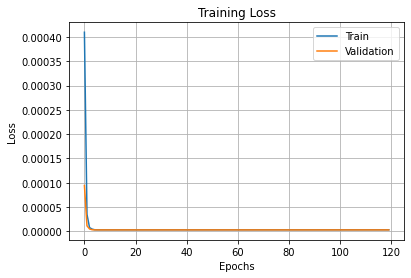

In [62]:
# speed
plt.plot(history_s.history['loss'], label='Train')
plt.plot(history_s.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

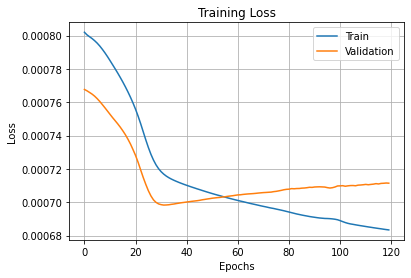

In [44]:
# position
plt.plot(history_p.history['loss'], label='Train')
plt.plot(history_p.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

In [45]:
# speed
# predicting on test data
prediction_speed = model_s.predict(test_features)
prediction_speed

array([[0.02851755, 0.0283477 , 0.02832631, ..., 0.02835034, 0.02803926,
        0.02868846],
       [0.02855161, 0.02834121, 0.02829586, ..., 0.02834176, 0.0280351 ,
        0.02865107],
       [0.02858627, 0.02830965, 0.02827714, ..., 0.02833771, 0.02801028,
        0.02858242],
       ...,
       [0.02860186, 0.02831016, 0.02825956, ..., 0.02834781, 0.02800841,
        0.02855099],
       [0.02856934, 0.02833284, 0.02829297, ..., 0.028352  , 0.02800471,
        0.02863762],
       [0.02854634, 0.02833407, 0.02831766, ..., 0.02835632, 0.02800217,
        0.02866449]], dtype=float32)

In [46]:
# position
# predicting on test data
prediction_pos = model_p.predict(test_features_pos)
prediction_pos

array([[ 0.005162  , -0.00248262,  0.00960974, ..., -0.01111064,
         0.00360997,  0.00242366],
       [ 0.00118655,  0.00430782,  0.00452456, ..., -0.00781273,
         0.0002237 , -0.00430086],
       [-0.00871506, -0.01749672, -0.01225893, ...,  0.02375588,
         0.01782695,  0.00744533],
       ...,
       [ 0.01231477,  0.00479361,  0.0172331 , ..., -0.02912738,
         0.00335099, -0.00338329],
       [ 0.00660479,  0.00293546,  0.00738053, ..., -0.01341489,
        -0.00201675, -0.00108767],
       [-0.00730263,  0.01354422, -0.00379188, ...,  0.00175448,
        -0.00058872, -0.009561  ]], dtype=float32)

In [47]:
# speed
cols_s=df_speed.columns
cols_s=list(cols_s)

In [48]:
# position
cols_p=df_pos.columns
cols_p=list(cols_p)

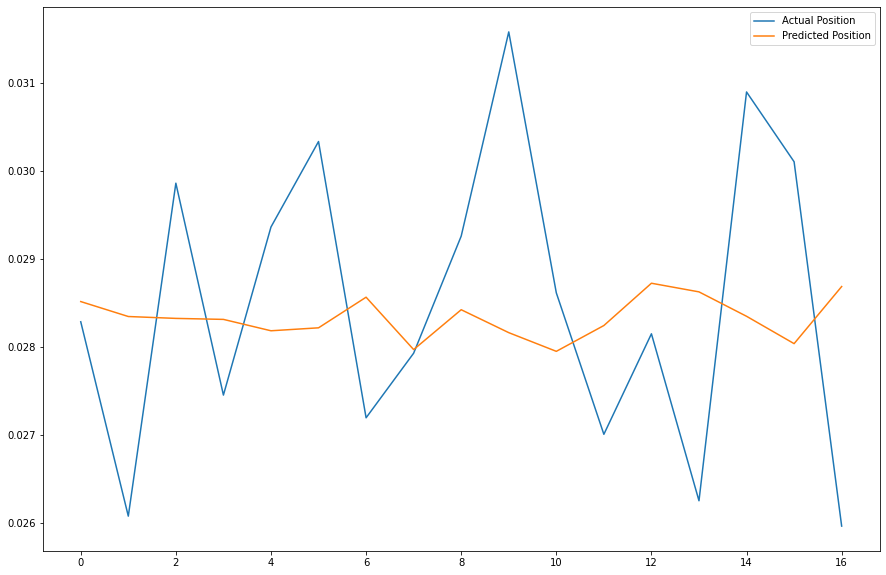

In [49]:
# speed graph with test labels
plt.figure(figsize=(15,10))
plt.plot(test_labels[0, :17], label='Actual Position');
plt.plot(prediction_speed[0, :17], label='Predicted Position');
plt.legend()

In [50]:
model_s.save('speed_lstm_updated.h5')

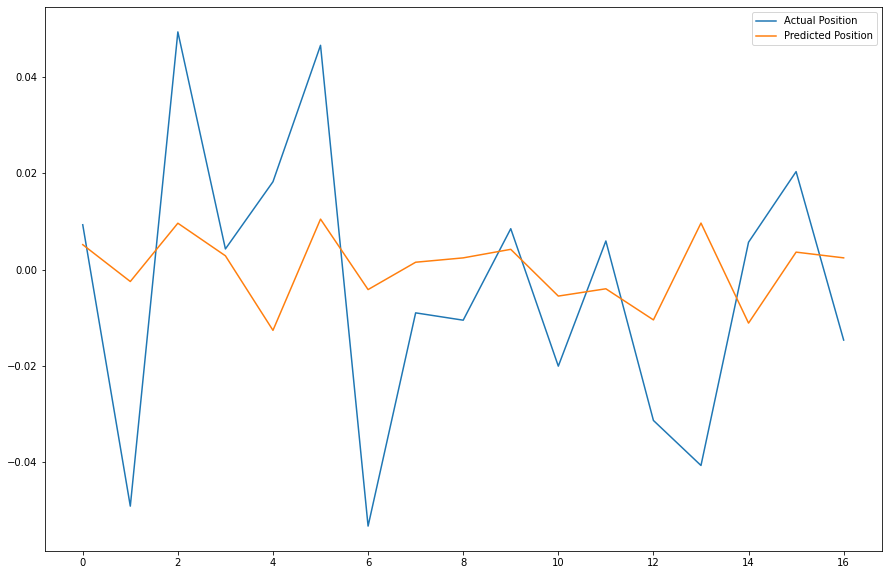

In [51]:
# position graph with test labels
plt.figure(figsize=(15,10))
plt.plot(test_labels_pos[0, :17], label='Actual Position');
plt.plot(prediction_pos[0, :17], label='Predicted Position');
plt.legend()

In [52]:
model_p.save('position_lstm_updated.h5')

In [53]:
prediction_pos.shape

(268, 17)

In [54]:
test_features_pos.shape

(268, 2, 17)

In [55]:
test_labels_pos.shape

(268, 17)

In [ ]:
for i in range(17):
    plt.plot(prediction_pos[:, i], label=f'Predicted pos {i}')
    plt.plot(test_labels_pos[:, i], label=f'Actual pos {i}')
    plt.legend()
    plt.show()

In [ ]:
for i in range(17):
    plt.plot(prediction_speed[:20, i], label=f'Predicted speed {i}')
    plt.plot(test_labels[:20, i], label=f'Actual speed {i}')
    plt.legend()
    plt.show()

In [58]:
# speed
import tensorflow as tf
loss = tf.keras.losses.mean_absolute_error(test_labels, prediction_speed)

In [ ]:
loss

In [60]:
max(loss)

<tf.Tensor: shape=(), dtype=float32, numpy=0.001977768>

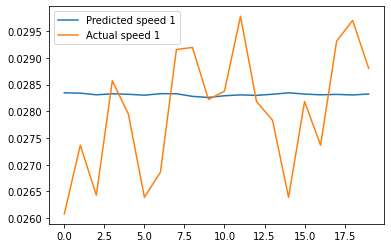

In [61]:
i=1
plt.plot(prediction_speed[:20, i], label=f'Predicted speed {i}')
plt.plot(test_labels[:20, i], label=f'Actual speed {i}')
ax = plt.gca()
# ax.set_ylim([0.18, 0.19])
plt.legend()
plt.show()


# ax = plt.gca()
# ax.set_xlim([xmin, xmax])


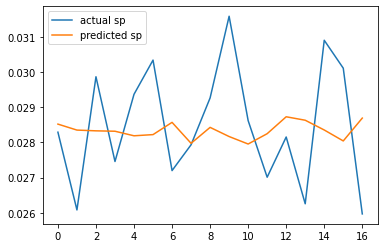

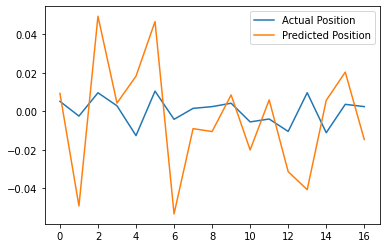

In [75]:
plt.plot(prediction_pos[0, :17], label='Actual Position');
plt.plot(test_labels_pos[0, :17], label='Predicted Position');
plt.legend()